In [1]:
import os
import math
import glob
import itertools

import pandas as pd
import matplotlib.pyplot as plt

## Setup/Config

In [2]:
reports_dir = '/data/benchmark_output/nemo_20220714'
save_plots = False

In [3]:
def load_files(filenames):
    for filename in filenames:
        # TODO: exp_name should be a column in the report
        exp_name = filename.split('-')[-2]
        df = pd.read_csv(filename)
        df['exp_name'] = list(itertools.repeat(exp_name, df.shape[0]))
        yield (df)
        

def plot_embedding(i, axs, model, model_df, label_col, chart_type='bar'):
    axs.set_title(f'{name.title()} - {model}')
    axs.set_facecolor((.9, .9, .9))

    exp_names = []
    for exp_name, plt_df in model_df.groupby(by=['exp_name']):
        labels = plt_df[label_col]
        values = plt_df['value']
        if chart_type == 'bar':
            axs.bar(labels, values, label=exp_name)
        elif chart_type == 'line':
            axs.plot(labels, values, label=exp_name)
        exp_names.append(exp_name)

    axs.legend(exp_names)
    return exp_names

## Samples

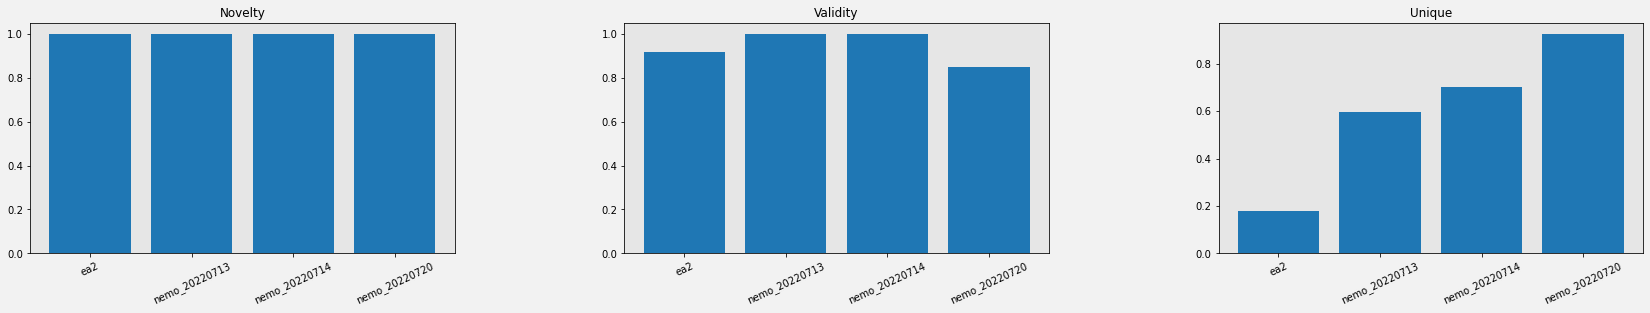

In [4]:
kpis = ['novelty', 'validity', 'unique']
comparison_fld = 'exp_name' # radius
value_fld = 'value'

num_plots = len(kpis)
plots_per_row = 3
rows = math.ceil(num_plots / plots_per_row)
fig = plt.figure(figsize=(28, (rows * 4)), facecolor=(.95, .95, .95))
axs = fig.subplots(math.ceil(num_plots / plots_per_row), 
                   math.ceil(num_plots / rows))

for i, kpi in enumerate(kpis):
    files = sorted(glob.glob(os.path.join(reports_dir, f'*{kpi}.csv'),
                             recursive=False))
    plt_df = pd.concat(load_files(files))
    labels = plt_df[comparison_fld]
    values = plt_df[value_fld]
    j = i // plots_per_row
    k = i % plots_per_row
    axs[k].bar(labels, values)
    axs[k].set_title(kpi.title())
    axs[k].set_facecolor((.9, .9, .9))
    axs[i].tick_params(axis='x', rotation=25)

fig.show()
fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
if save_plots:
    fig.savefig('sample_metrics.png')

## Embedding Physchem

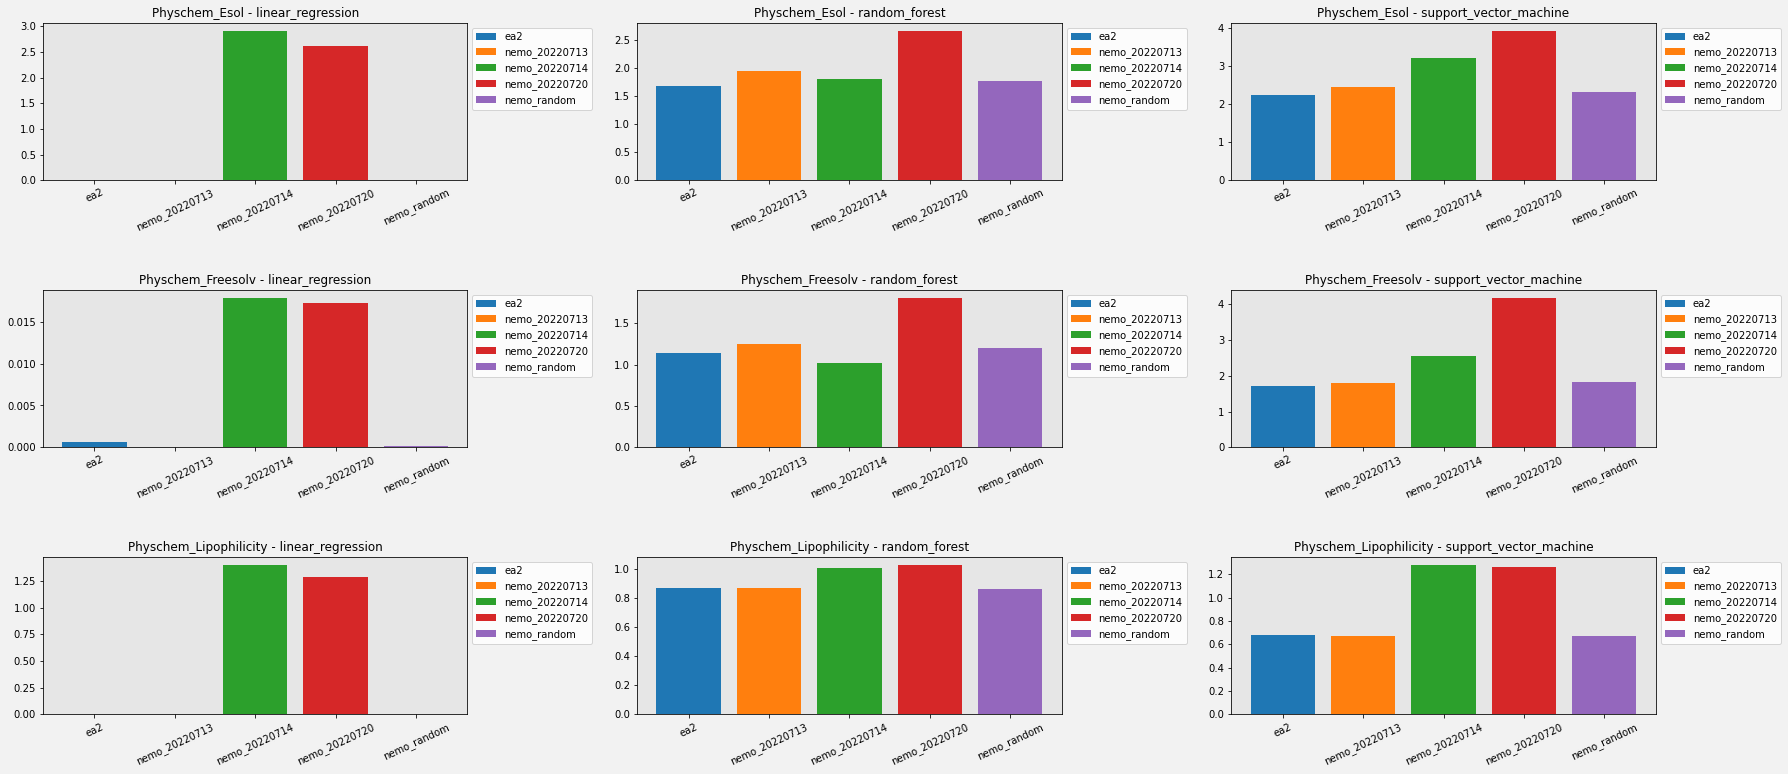

In [5]:
kpis = ['physchem']
comparison_fld = 'exp_name'

num_plots = 9
plots_per_row = 3
rows = math.ceil(num_plots / plots_per_row)
fig = plt.figure(figsize=(28, (rows * 4)), facecolor=(.95, .95, .95))
axs = fig.subplots(math.ceil(num_plots / plots_per_row), 
                   math.ceil(num_plots / rows))

merged_axs = [elem for sublist in axs for elem in sublist]

i = 0
for kpi in kpis:
    files = sorted(glob.glob(os.path.join(reports_dir, f'*-{kpi}*.csv'),
                             recursive=False))
    data_df = pd.concat(load_files(files))
    data_df = data_df[data_df['model'].str.contains('y_randomized_*',regex=True) == False]

    for name, name_df in data_df.groupby(by=['name']):
        for model, model_df in name_df.groupby(by=['model']):
            labels = plot_embedding(i, merged_axs[i], model, model_df, 'exp_name', chart_type='bar')
            merged_axs[i].legend(loc="upper left", bbox_to_anchor=(1, 1))
            merged_axs[i].tick_params(axis='x', rotation=25)
            i = i + 1
    
# plt.xticks(rotation=90);
model_df[['name', 'model', 'exp_name', 'value']]
fig.show()
fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.7)
if save_plots:
    fig.savefig('embedding_metrics_physchem.png')

## Embedding Bioactivity

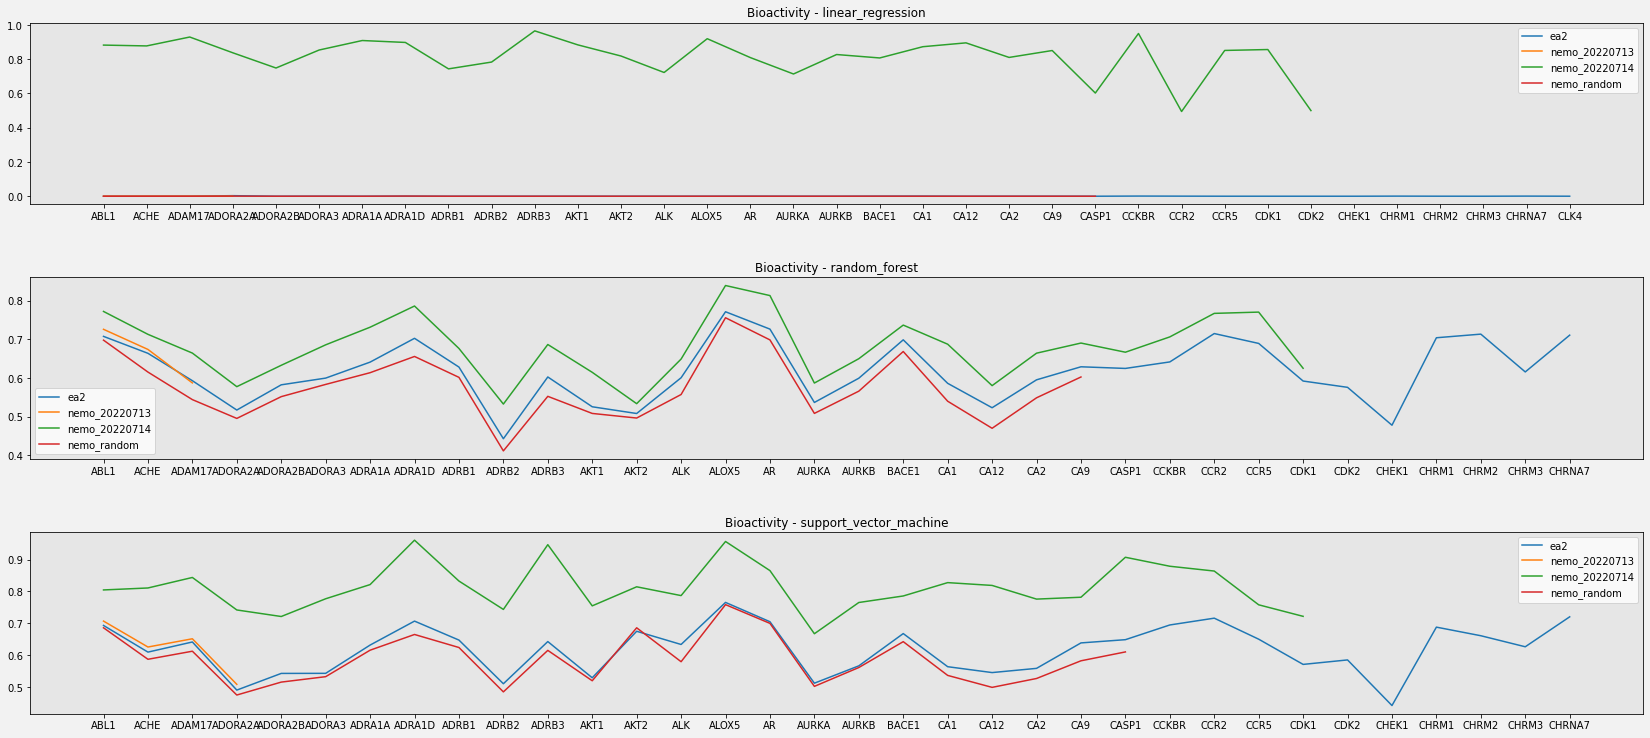

In [6]:
kpis = ['bioactivity']
comparison_fld = 'exp_name'

num_plots = 3 # len(kpis)
plots_per_row = 1
rows = math.ceil(num_plots / plots_per_row)
fig = plt.figure(figsize=(28, (rows * 4)), facecolor=(.95, .95, .95))
axs = fig.subplots(math.ceil(num_plots / plots_per_row), 
                   math.ceil(num_plots / rows))

i = 0
for kpi in kpis:
    files = sorted(glob.glob(os.path.join(reports_dir, f'*-{kpi}.csv'),
                             recursive=False))
    data_df = pd.concat(load_files(files))

    for name, name_df in data_df.groupby(by=['name']):
        for model, model_df in name_df.groupby(by=['model']):
            plot_embedding(i, axs[i], model, model_df, 'gene', chart_type='line')
            i = i + plots_per_row
    
fig.show()
fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
if save_plots:
    fig.savefig('embedding_metrics_bioactivity.png')

In [7]:
# from bokeh.io import output_notebook, push_notebook, show
# from bokeh.palettes import Spectral5
# from bokeh.plotting import figure
# from bokeh.sampledata.autompg import autompg as df
# from bokeh.transform import factor_cmap
# from bokeh.layouts import column, gridplot

# output_notebook()


# def split(a, n):
#     k, m = divmod(len(a), n)
#     return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

# plots = []
# for i, kpi in enumerate(kpis):
#     files = sorted(glob.glob(os.path.join(reports_dir, f'*{kpi}.csv'),
#                              recursive=False))
#     plt_df = pd.concat(load_files(files))

#     p = figure(width=400,
#                height=200,
#                x_range=plt_df[comparison_fld],
#                title=kpi.title())

#     p.vbar(x=plt_df[comparison_fld],
#            top=plt_df[value_fld],
#            width=0.9)
#     plots.append(p)

# plots = split(plots, len(plots) // 3)
# grid_plot = gridplot(plots, toolbar_location='right')
# show(grid_plot)